In [1]:
# Data vizualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data_iris = pd.read_csv('./Iris.csv')
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Data analysis of the dataset

In [3]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data_iris.drop(['Id'], axis=1, inplace=True)

In [5]:
data_iris.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [6]:
data_iris.isnull().count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

We have no missing values in our dataset and the values are relatively homogeneous for each species

### 2. Data vizualisation

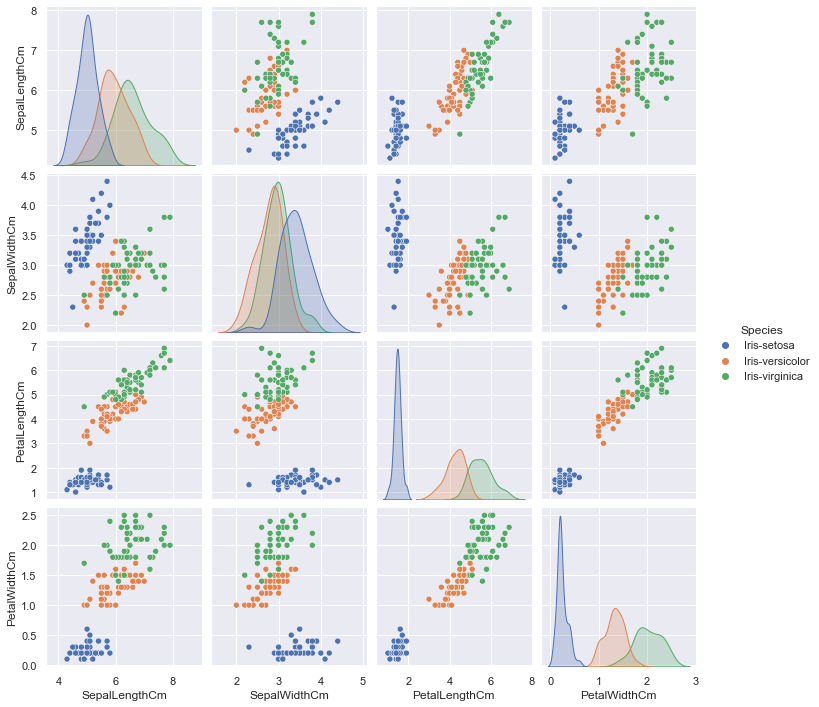

In [8]:
sns.set_theme(style='darkgrid')
sns.pairplot(data_iris, hue='Species')

We can observe that the Setosa class is quite distinct from the other two species, we can see it quite clearly, we continue the visualization of the data, taking now each variable separately

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Largeur du pétale (cm)')

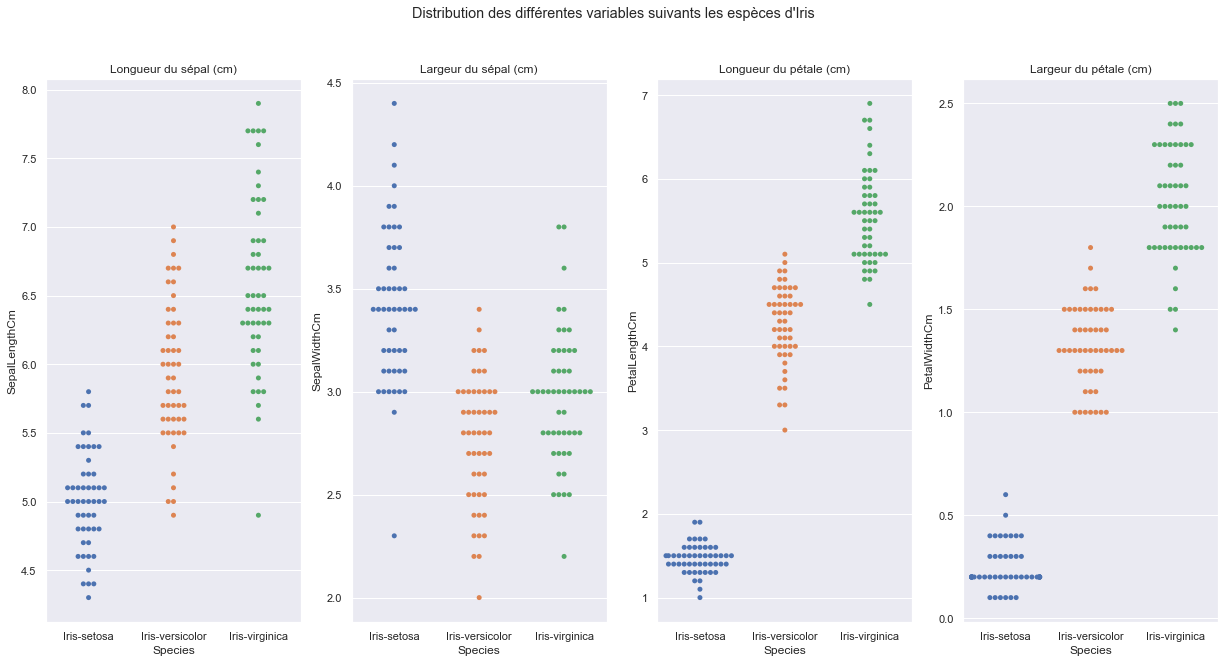

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(21, 10))
fig.suptitle('Distribution des différentes variables suivants les espèces d\'Iris')

sns.swarmplot(ax=axes[0], x="Species", y="SepalLengthCm", data=data_iris)
axes[0].set_title('Longueur du sépal (cm)')

sns.swarmplot(ax=axes[1], x="Species", y="SepalWidthCm", data=data_iris)
axes[1].set_title('Largeur du sépal (cm)')

sns.swarmplot(ax=axes[2], x="Species", y="PetalLengthCm", data=data_iris)
axes[2].set_title('Longueur du pétale (cm)')

sns.swarmplot(ax=axes[3], x="Species", y="PetalWidthCm", data=data_iris)
axes[3].set_title('Largeur du pétale (cm)')

Text(0.5, 1.0, 'Largeur du pétale (cm)')

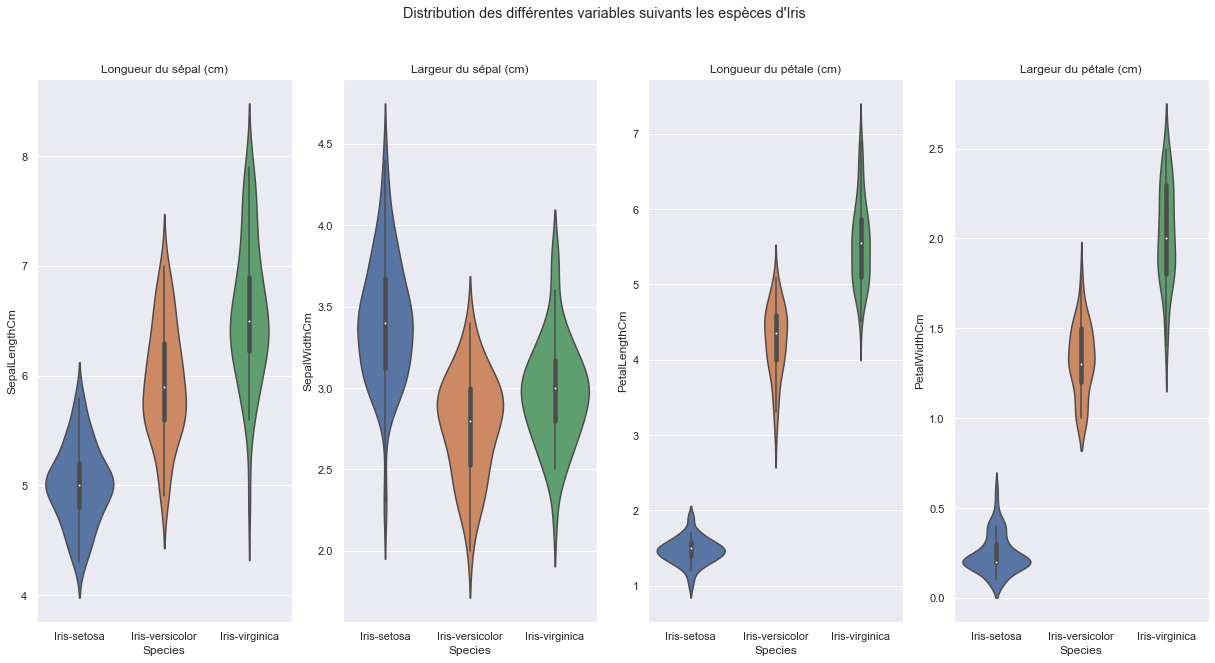

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(21, 10))
fig.suptitle('Distribution des différentes variables suivants les espèces d\'Iris')

sns.violinplot(ax=axes[0], x="Species", y="SepalLengthCm", data=data_iris)
axes[0].set_title('Longueur du sépal (cm)')

sns.violinplot(ax=axes[1], x="Species", y="SepalWidthCm", data=data_iris)
axes[1].set_title('Largeur du sépal (cm)')

sns.violinplot(ax=axes[2], x="Species", y="PetalLengthCm", data=data_iris)
axes[2].set_title('Longueur du pétale (cm)')

sns.violinplot(ax=axes[3], x="Species", y="PetalWidthCm", data=data_iris)
axes[3].set_title('Largeur du pétale (cm)')

### 3. Classification
#### Data preparation

In [11]:
etiq = data_iris['Species']
data_iris.drop(['Species'],axis=1,inplace=True)

In [12]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(data_iris, etiq, test_size=0.3,random_state=23)

#### a. Random Forest

In [17]:
forrest = RandomForestClassifier(n_estimators = 3, max_features = 'sqrt', criterion = 'entropy', random_state=150).fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yforrest))

Taux de précision lors des tests :  1.0


Text(0.5, 1.0, 'Confusion matrix Random Forest')

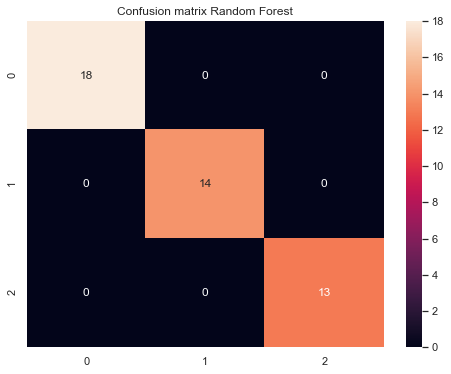

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True)
plt.title("Confusion matrix Random Forest")

We can see that in this kind of problem that algorithms such as Random Forrest is very powerful to give us the result with a perfect classification, we will redo but with a single decision tree
#### b. Decision Tree

In [24]:
dTree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy').fit(fv_train,etiq_train)
ydTree = dTree.predict(fv_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ydTree))

Taux de précision lors des tests :  0.9777777777777777


We can see that with a single tree we have excellent results with 97.78% accuracy, we display the confusion matrix to see the classification errors

Text(0.5, 1.0, "Matrice de confusion avec l'algorithme basé sur un arbre de décision")

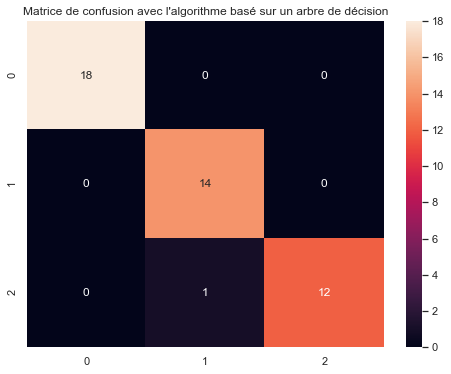

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ydTree), annot=True)
plt.title("Matrice de confusion avec l'algorithme basé sur un arbre de décision")

We can see that we have only one misclassified case which proves that there is no fault, we now display the decision tree 

Text(0.5, 1.0, 'The decision tree')

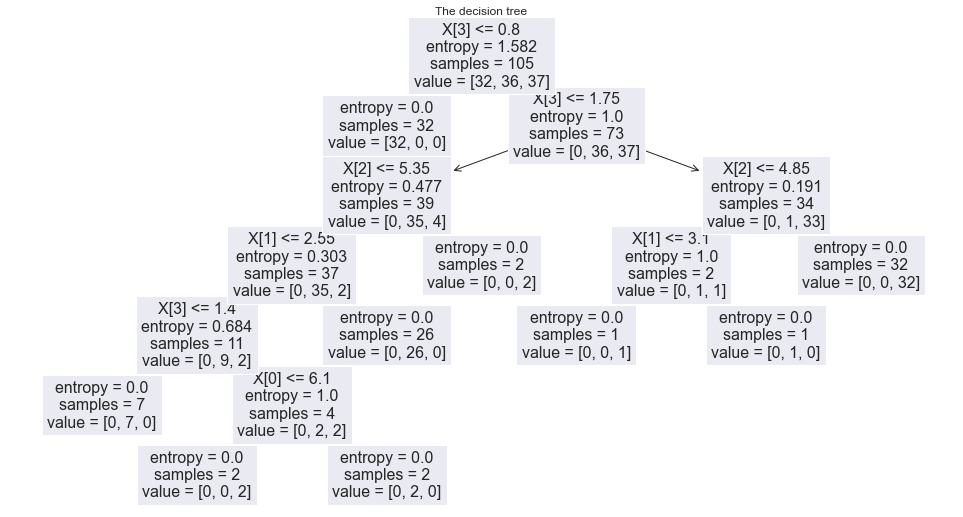

In [27]:
plt.figure(figsize=(17,9))
_= tree.plot_tree(dTree)
plt.title("The decision tree")